from IPython.core.display import display, HTML
display(HTML("<style>.container { width:99% !important;}</style>"))

# PROJECT SETUP

### IMPORTS

In [1]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import sys

### COLLECTING DATA

In [2]:
subjects_quantity = 40
sbj_photos = 10

people_raw = list() # ALL 10 PHOTOS FROM EACH PERSON
people_subjects = list() # FIRST PHOTO FROM EACH PERSON
people_dataset_raw = list() # 9 PHOTOS FOR EACH PERSON DATASET

for j in range(1, subjects_quantity+1):
    # For para cada imagem
    for i in range(1, sbj_photos+1):
        people_raw.append(np.array(cv2.imread(f'./orl_faces/orl_faces/s{j}/{i}.pgm',0)))
        if i == 1:
            people_subjects.append(np.array(cv2.imread(f'./orl_faces/orl_faces/s{j}/{i}.pgm',0)))
        if i != 1:
            people_dataset_raw.append(np.array(cv2.imread(f'./orl_faces/orl_faces/s{j}/{i}.pgm',0)))

In [3]:
print(f"Dataset size: {len(people_dataset_raw)}")

Dataset size: 360


### RAW DATA SHOW UP

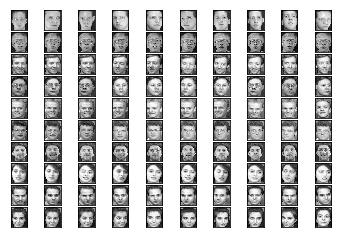

In [4]:
nrows, ncols = 10, 10

for j in range(0,nrows*ncols,10):
    for i in range(1,11):
        plt.subplot(nrows, ncols, i + j)
        plt.imshow(people_raw[i-1 + j], cmap = 'gray')
        plt.xticks([]), plt.yticks([])
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.1)
plt.show()

### BELOW, ALL THE ARRAYS ARE DATASET ONLY

Creating an array with fourier transform from raw data set array:

In [5]:
people_fft = [np.fft.fft2(person) for person in people_dataset_raw]

people_unique_fft = [np.fft.fft2(person) for person in people_subjects]

'people_fft' is now an array containing a fourier transformed version of each photo from the dataset.

To conclude an ideal analysis, the original fourier transformed image is not the easiest data to work with, so, the purpose of the next command is to create a  version of each imagem with it's relative relevant data shifted to the center of the picture.

In [6]:
people_fft_s = [np.fft.fftshift(person) for person in people_fft]

people_unique_fft_s = [np.fft.fftshift(person) for person in people_unique_fft]

Now, showing one example from the raw data, the fourier transformed, and the shifted one:

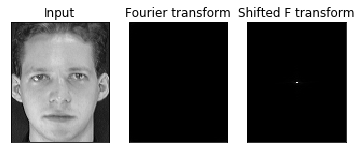

In [7]:
plt.subplot(131)
plt.imshow(people_raw[0], cmap = 'gray')
plt.title('Input'), plt.xticks([]), plt.yticks([])

plt.subplot(132)
plt.imshow(np.abs(people_fft[0]), cmap = 'gray')
plt.title('Fourier transform'), plt.xticks([]), plt.yticks([])

plt.subplot(133)
plt.imshow(np.abs(people_fft_s[0]), cmap = 'gray')
plt.title('Shifted F transform'), plt.xticks([]), plt.yticks([])

plt.show()

# FINISHED SETUP

### STARTING THE PROJECT

The next part of the project consists of:

1. Analyze the mean square error
1. Classify
1. TODO(CONSERTAR E COMPLETAR ESSA LISTA)


We need to create a function that returns only the relevant part of the image based on an user input. That integer input will be the dimensions of the usable image data.

Ex.: N is the input for an NxN classification test.

In [8]:
def crop_img(n, image):
    # IMAGE DIMENSIONS FROM THE DATABASE
    image_width = 92
    image_height = 112
    
    # CENTER OF THE IMAGE FOR THE IMPROVED SHIFTED IMAGE
    x = image_height//2
    y = image_width//2
    
    # RADIUS OF THE AREA
    r = n//2
    
    odd = 0
    if n % 2 != 0:
        odd = -1
    
    return image[x-r+odd:x+r,y-r+odd:y+r]

In [9]:
people = np.array(people_fft_s)
people.shape

(360, 112, 92)

In [10]:
cropped = crop_img(30, people_raw[0])
cropped.shape

(30, 30)

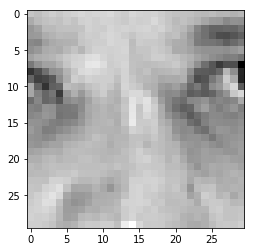

In [11]:
plt.imshow(cropped, "gray")

Cropped all datasets

In [12]:
dimension = 5
crop_full = []
crop_unique = []

for image in people_fft_s:
    crop_full.append(np.array(crop_img(dimension, image)).flatten())
    
    
for image in people_unique_fft_s:
    crop_unique.append(np.array(crop_img(dimension, image)).flatten())

Exemple of Sklearn

```
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y) 

print(neigh.predict([[1.1]]))

print(neigh.predict_proba([[0.9]]))
```

In [13]:
X = np.array(crop_full)
X.shape

(360, 25)

Labels para o KNN

In [14]:
y = [i for i in range(40) for j in range(9)]

In [15]:
print(y)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 3

In [16]:
from sklearn.neighbors import KNeighborsClassifier
#neigh = KNeighborsClassifier(n_neighbors=1, metric="seuclidean", metric_params={"V":25})
neigh = KNeighborsClassifier(n_neighbors=1, metric="euclidean")

In [17]:
neigh.fit(X.real, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [18]:
y_predict = []

for image in crop_unique:
    y_predict.append(neigh.predict([image.real]))
    print(neigh.predict([image.real]), end= " ")

y_predict = np.array(y_predict)
    
print()


[0] [1] [2] [3] [4] [5] [6] [7] [8] [9] [10] [11] [12] [13] [14] [23] [16] [17] [18] [19] [20] [21] [22] [23] [24] [25] [26] [27] [28] [29] [30] [31] [32] [33] [34] [35] [36] [37] [38] [39] 


Exemple of confusion matrix

```
from sklearn.metrics import confusion_matrix
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)
```

In [19]:
from sklearn.metrics import confusion_matrix
y_true = [i for i in range(0,40)]
y_pred = y_predict

conf_matrix = confusion_matrix(y_true, y_pred)

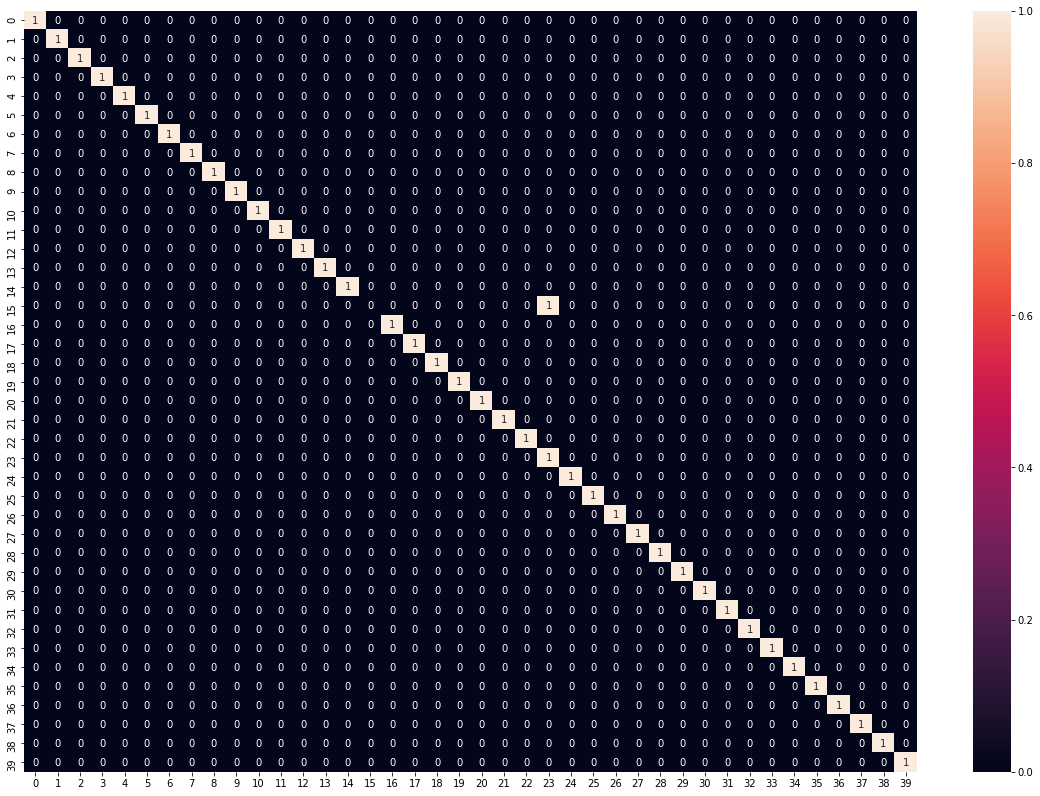

In [20]:
df_cm = pd.DataFrame(conf_matrix)
plt.figure(figsize = (10*2,7*2))
sn.heatmap(df_cm, annot=True)

In [21]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true, y_pred)

1.6

Implementando KNN com o erro medio quadradico como medida


In [33]:
import math

indices_mais_proximos = []

foo = []

# Para cada imagem sem label execute
for i, image_without_label in enumerate(crop_unique):
    
    mais_proximo_até_agora = math.inf
    indice_mais_proximo = 0
    
    print("Para pessoa", i )
    # Para cada imagem com label execute     
    for j, image_with_label in enumerate(crop_full):
        mqe = mean_squared_error(image_with_label.real, image_without_label.real)
        if mqe < mais_proximo_até_agora:
            mais_proximo_até_agora = mqe
            indice_mais_proximo = j
            print(indice_mais_proximo)
    print(indice_mais_proximo)
    indices_mais_proximos.append(indice_mais_proximo)
    foo.append(y[indice_mais_proximo])

Para pessoa 0
0
1
1
Para pessoa 1
0
1
5
6
8
9
10
10
Para pessoa 2
0
1
8
9
10
14
16
18
19
19
Para pessoa 3
0
1
8
9
10
13
14
16
18
20
27
28
28
Para pessoa 4
0
4
14
18
20
21
36
38
38
Para pessoa 5
0
18
36
37
45
46
46
Para pessoa 6
0
1
8
9
10
18
19
22
54
55
58
59
59
Para pessoa 7
0
1
6
8
9
10
14
18
19
20
24
58
62
63
63
Para pessoa 8
0
1
8
9
10
13
14
16
18
72
73
73
Para pessoa 9
0
1
8
9
10
11
16
18
60
72
81
81
Para pessoa 10
0
1
6
8
9
11
13
18
54
90
91
94
94
Para pessoa 11
0
1
5
8
66
69
103
105
105
Para pessoa 12
0
1
8
14
20
21
36
37
108
108
Para pessoa 13
0
1
6
9
10
14
20
21
92
117
117
Para pessoa 14
0
1
5
8
9
11
13
16
127
127
Para pessoa 15
0
1
8
9
11
16
92
117
130
139
210
210
Para pessoa 16
0
1
6
8
9
10
27
28
29
30
62
65
127
144
147
147
Para pessoa 17
0
1
3
8
37
39
40
42
43
44
112
153
158
160
160
Para pessoa 18
0
1
5
8
9
12
13
17
130
162
162
Para pessoa 19
0
1
8
9
10
11
13
16
18
132
171
171
Para pessoa 20
0
1
8
9
10
14
16
18
72
73
171
180
180
Para pessoa 21
0
1
6
8
9
10
11
16
18
27
28
54

In [34]:
indices_mais_proximos

[1,
 10,
 19,
 28,
 38,
 46,
 59,
 63,
 73,
 81,
 94,
 105,
 108,
 117,
 127,
 210,
 147,
 160,
 162,
 171,
 180,
 190,
 206,
 207,
 224,
 229,
 236,
 247,
 252,
 269,
 276,
 282,
 289,
 297,
 306,
 318,
 325,
 337,
 345,
 357]

In [35]:
labels_mais_proximos = []

for indice in indices_mais_proximos:
    labels_mais_proximos.append(y[indice])

In [36]:
labels_mais_proximos == foo

True

In [37]:
from sklearn.metrics import confusion_matrix
y_true = [i for i in range(0,40)]
y_pred = labels_mais_proximos

conf_matrix = confusion_matrix(y_true, y_pred)

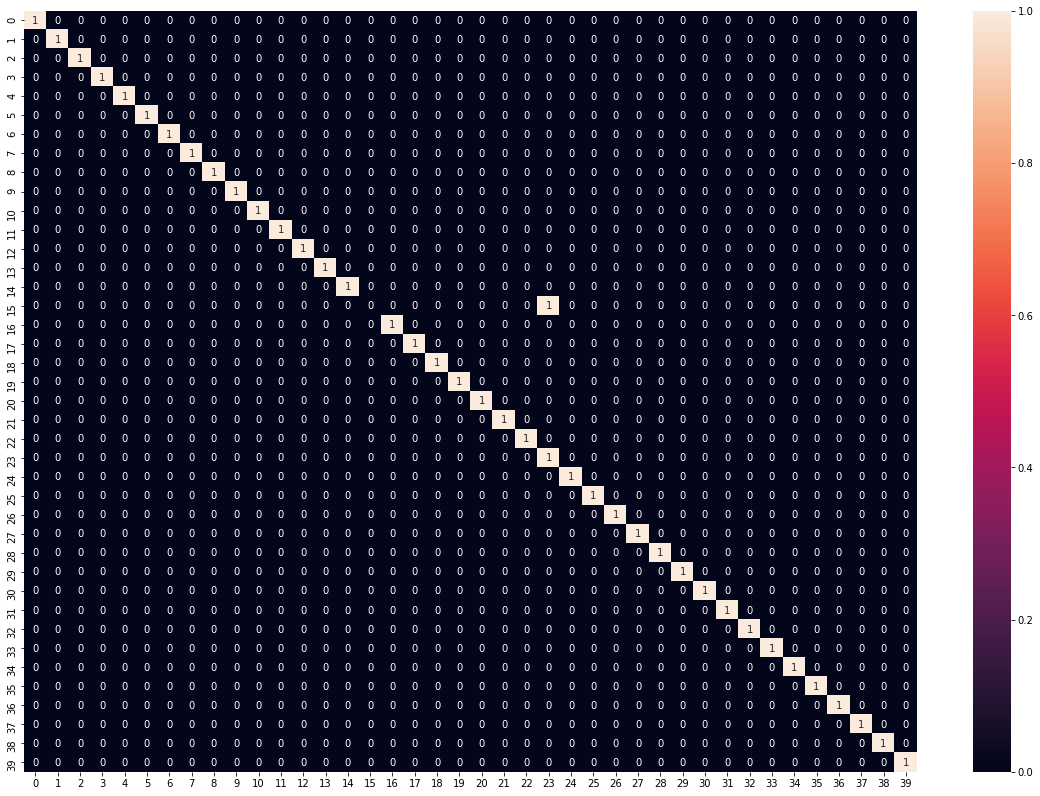

In [38]:
df_cm = pd.DataFrame(conf_matrix)
plt.figure(figsize = (10*2,7*2))
sn.heatmap(df_cm, annot=True)